In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# EXAMPLE 1

In [2]:
def f(x, scale=0.1):
    val = 0.2 * x + 1 + np.random.RandomState(12).normal(scale=scale, size=len(x))
    return val


X = np.linspace(0, 10, 20)
y = f(X, scale=0.1)
y_ideal = f(X, scale=0)

X = X.reshape(-1, 1)
X = np.hstack((np.ones(len(X)).reshape(-1, 1), X))

beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
y_hat = X.dot(beta)

In [3]:
beta

array([0.9750782 , 0.20574032])

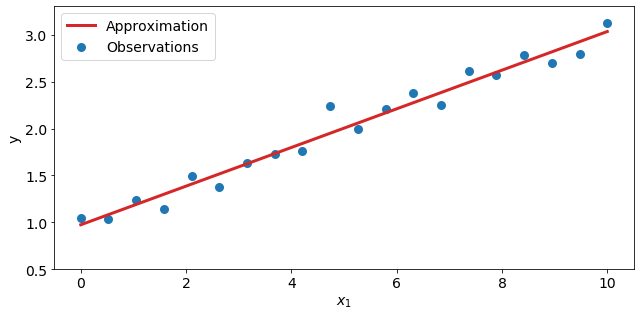

In [4]:
plt.figure(figsize=(9, 4.5))

#plt.plot(X[:, 1], y_ideal, linewidth=2, label=r"$y = 1 + 0.2x_{1}$", color='0')
plt.scatter(X[:, 1], y, linewidth=3, label="Observations")

plt.plot(X[:, 1], y_hat, linewidth=3, label="Approximation", color='C3')


plt.xlabel(r'$x_{1}$', size=14)
plt.xticks(size=14)

plt.ylabel(r"y", size=14)
plt.yticks(size=14)

plt.xlim(-0.5, 10.5)
plt.ylim(0.5, 3.3)

plt.legend(loc='best', fontsize=14)

plt.tight_layout()
plt.savefig(fname="plots/approximation_example_1.pdf", format="pdf")
plt.show()

# EXAMPLE 2

In [5]:
def f(x, scale=0.1):
    val = 1. * x**3 - 6. * x + 2. + np.random.RandomState(11).normal(scale=scale, size=len(x))
    return val


X1 = np.linspace(-3, 3, 30)
y = f(X1, scale=.5)
y_ideal = f(X1, scale=0)

X1 = X1.reshape(-1, 1)
X = np.hstack((np.ones(len(X1)).reshape(-1, 1), X1))
X = np.hstack((X, X1**2, X1**3, X1**4))

beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
y_hat = X.dot(beta)

In [6]:
beta

array([ 2.03728142e+00, -5.70291442e+00, -3.81927945e-02,  9.57335197e-01,
        3.97338699e-03])

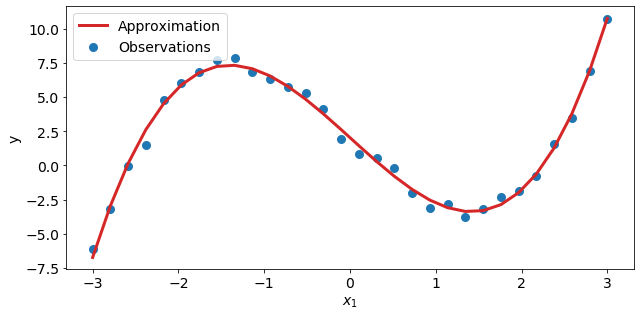

In [7]:
plt.figure(figsize=(9, 4.5))

#plt.plot(X[:, 1], y_ideal, linewidth=2, label=r"$y = 1 + 0.2x_{1}$", color='0')
plt.scatter(X[:, 1], y, linewidth=3, label="Observations")

plt.plot(X[:, 1], y_hat, linewidth=3, label="Approximation", color='C3')


plt.xlabel(r'$x_{1}$', size=14)
plt.xticks(size=14)

plt.ylabel(r"y", size=14)
plt.yticks(size=14)

#plt.xlim(-0.5, 10.5)
#plt.ylim(0.5, 3.3)

plt.legend(loc='best', fontsize=14)

plt.tight_layout()
plt.savefig(fname="plots/approximation_example_2.pdf", format="pdf")
plt.show()

# EXAMPLE 3

In [8]:
def f(x, scale=0.1):
    val = 2 * x + 1 + np.random.RandomState(12).normal(scale=scale, size=len(x))
    return val
    

X = np.linspace(0, 1, 20)
y = f(X, scale=0.1)
y_ideal = f(X, scale=0)

X = X.reshape(-1, 1)
X = np.hstack((np.ones(len(X)).reshape(-1, 1), X))

In [9]:
def loss(beta, X, y, SGD=False):
    if not SGD:
        R = X.dot(beta) - y
        val = 1. * (R.T).dot(R) / len(X)
    else:
        R = X.dot(beta) - y
        k = np.random.RandomState(None).randint(low=0, high=len(X)-1)
        val = 1. * (R[[k]].T).dot(R[[k]]) / len(X[[k], :])
    return val

def grad(beta, X, y, SGD=False):
    
    if not SGD:
        R = X.dot(beta) - y
        g = 2. * (X.T).dot(R) / len(X)
    else:
        k = np.random.RandomState(None).randint(low=0, high=len(X)-1)
        R = X.dot(beta) - y
        g = 2. * (X[[k], :].T).dot(R[[k]]) / len(X[[k], :])
    return g

In [10]:
alpha = 0.2
n_iters = 101

beta_0 = np.array([0., 0.])
loss_0 = loss(beta_0, X, y)
beta_curr = beta_0
loss_curr = loss_0

beta_iters = [beta_0]
loss_iters = [loss_0]
for i in range(1, n_iters):
    print('Iteration: ', i)
    print ('Current beta: ', beta_curr)
    print ('Current loss: ', loss_curr)
    g = grad(beta_curr, X, y)
    g = np.round(g, 4)
    print('Gradient: ', g)
    beta_new = beta_curr - alpha * g
    beta_new = np.round(beta_new, 4)
    loss_new = loss(beta_new, X, y)
    beta_iters.append(beta_new)
    loss_iters.append(loss_new)
    print('New beta: ', beta_new, '\n')
    print('New loss: ', loss_new, '\n')
    beta_curr = beta_new
    loss_curr = loss_new
beta_iters = np.array(beta_iters)
loss_iters = np.array(loss_iters)

Iteration:  1
Current beta:  [0. 0.]
Current loss:  4.417155901540405
Gradient:  [-4.0076 -2.3828]
New beta:  [0.8015 0.4766] 

New loss:  1.1715717506065206 

Iteration:  2
Current beta:  [0.8015 0.4766]
Current loss:  1.1715717506065206
Gradient:  [-1.928  -1.2552]
New beta:  [1.1871 0.7276] 

New loss:  0.3801261688712504 

Iteration:  3
Current beta:  [1.1871 0.7276]
Current loss:  0.3801261688712504
Gradient:  [-0.9058 -0.6978]
New beta:  [1.3683 0.8672] 

New loss:  0.1833795243245337 

Iteration:  4
Current beta:  [1.3683 0.8672]
Current loss:  0.1833795243245337
Gradient:  [-0.4038 -0.4211]
New beta:  [1.4491 0.9514] 

New loss:  0.13105419060322615 

Iteration:  5
Current beta:  [1.4491 0.9514]
Current loss:  0.13105419060322615
Gradient:  [-0.158  -0.2827]
New beta:  [1.4807 1.0079] 

New loss:  0.1139651871405056 

Iteration:  6
Current beta:  [1.4807 1.0079]
Current loss:  0.1139651871405056
Gradient:  [-0.0383 -0.2125]
New beta:  [1.4884 1.0504] 

New loss:  0.105645532944

Current beta:  [1.034  1.9482]
Current loss:  0.013266297721209436
Gradient:  [ 0.0086 -0.0158]
New beta:  [1.0323 1.9514] 

New loss:  0.013202014407680337 

Iteration:  83
Current beta:  [1.0323 1.9514]
Current loss:  0.013202014407680337
Gradient:  [ 0.0084 -0.0153]
New beta:  [1.0306 1.9545] 

New loss:  0.013141122556215478 

Iteration:  84
Current beta:  [1.0306 1.9545]
Current loss:  0.013141122556215478
Gradient:  [ 0.0081 -0.0149]
New beta:  [1.029  1.9575] 

New loss:  0.013084279888245199 

Iteration:  85
Current beta:  [1.029  1.9575]
Current loss:  0.013084279888245199
Gradient:  [ 0.0079 -0.0144]
New beta:  [1.0274 1.9604] 

New loss:  0.013030516577075976 

Iteration:  86
Current beta:  [1.0274 1.9604]
Current loss:  0.013030516577075976
Gradient:  [ 0.0076 -0.014 ]
New beta:  [1.0259 1.9632] 

New loss:  0.012980451396769763 

Iteration:  87
Current beta:  [1.0259 1.9632]
Current loss:  0.012980451396769763
Gradient:  [ 0.0074 -0.0136]
New beta:  [1.0244 1.9659] 

New l

In [11]:
alpha = 0.2
n_iters = 101

beta_0 = np.array([0., 0.])
loss_0 = loss(beta_0, X, y)
beta_curr = beta_0
loss_curr = loss_0

beta_iters_sgd = [beta_0]
loss_iters_sgd = [loss_0]
for i in range(1, n_iters):
    print('Iteration: ', i)
    print ('Current beta: ', beta_curr)
    print ('Current loss: ', loss_curr)
    g = grad(beta_curr, X, y, SGD=True)
    g = np.round(g, 4)
    print('Gradient: ', g)
    beta_new = beta_curr - alpha * g
    beta_new = np.round(beta_new, 4)
    loss_new = loss(beta_new, X, y, SGD=False)
    beta_iters_sgd.append(beta_new)
    loss_iters_sgd.append(loss_new)
    print('New beta: ', beta_new, '\n')
    print('New loss: ', loss_new, '\n')
    beta_curr = beta_new
    loss_curr = loss_new
beta_iters_sgd = np.array(beta_iters_sgd)
loss_iters_sgd = np.array(loss_iters_sgd)

Iteration:  1
Current beta:  [0. 0.]
Current loss:  4.417155901540405
Gradient:  [-3.4496 -1.2709]
New beta:  [0.6899 0.2542] 

New loss:  1.7200796967000453 

Iteration:  2
Current beta:  [0.6899 0.2542]
Current loss:  1.7200796967000453
Gradient:  [-2.3383 -1.2307]
New beta:  [1.1576 0.5003] 

New loss:  0.5907164885318155 

Iteration:  3
Current beta:  [1.1576 0.5003]
Current loss:  0.5907164885318155
Gradient:  [-1.1439 -0.602 ]
New beta:  [1.3864 0.6207] 

New loss:  0.29653251799701213 

Iteration:  4
Current beta:  [1.3864 0.6207]
Current loss:  0.29653251799701213
Gradient:  [0.7639 0.0402]
New beta:  [1.2336 0.6127] 

New loss:  0.41952644924815985 

Iteration:  5
Current beta:  [1.2336 0.6127]
Current loss:  0.41952644924815985
Gradient:  [0.044  0.0116]
New beta:  [1.2248 0.6104] 

New loss:  0.4294682502318718 

Iteration:  6
Current beta:  [1.2248 0.6104]
Current loss:  0.4294682502318718
Gradient:  [0.4396 0.0231]
New beta:  [1.1369 0.6058] 

New loss:  0.524302262454815 

Current beta:  [1.1794 1.7917]
Current loss:  0.023759700706187346
Gradient:  [0.2262 0.0714]
New beta:  [1.1342 1.7774] 

New loss:  0.019736047589592194 

Iteration:  52
Current beta:  [1.1342 1.7774]
Current loss:  0.019736047589592194
Gradient:  [0.0525 0.0498]
New beta:  [1.1237 1.7674] 

New loss:  0.01990857778267075 

Iteration:  53
Current beta:  [1.1237 1.7674]
Current loss:  0.01990857778267075
Gradient:  [-0.2656 -0.1677]
New beta:  [1.1768 1.8009] 

New loss:  0.02360708017593145 

Iteration:  54
Current beta:  [1.1768 1.8009]
Current loss:  0.02360708017593145
Gradient:  [0.1191 0.0251]
New beta:  [1.153  1.7959] 

New loss:  0.020672793999773016 

Iteration:  55
Current beta:  [1.153  1.7959]
Current loss:  0.020672793999773016
Gradient:  [0.5055 0.133 ]
New beta:  [1.0519 1.7693] 

New loss:  0.02431415127961947 

Iteration:  56
Current beta:  [1.0519 1.7693]
Current loss:  0.02431415127961947
Gradient:  [-0.236  -0.1863]
New beta:  [1.0991 1.8066] 

New loss:  0.017944

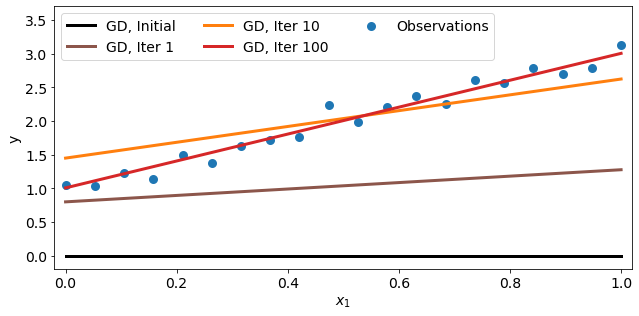

In [12]:
plt.figure(figsize=(9, 4.5))

#plt.plot(X[:, 1], y_ideal, linewidth=2, label=r"$y = 1 + 0.2x_{1}$", color='0')
plt.scatter(X[:, 1], y, linewidth=3, label="Observations")

#plt.plot(X[:, 1], y_hat, linewidth=3, label="Approximation", color='C3')


plt.plot(X[:, 1], X.dot(beta_iters[0]), linewidth=3, color='0', label="GD, Initial")
plt.plot(X[:, 1], X.dot(beta_iters[1]), linewidth=3, color='C5', label="GD, Iter 1")
plt.plot(X[:, 1], X.dot(beta_iters[10]), linewidth=3, color='C1', label="GD, Iter 10")
plt.plot(X[:, 1], X.dot(beta_iters[100]), linewidth=3, color='C3', label="GD, Iter 100")


plt.xlabel(r'$x_{1}$', size=14)
plt.xticks(size=14)

plt.ylabel(r"y", size=14)
plt.yticks(size=14)

plt.xlim(-0.02, 1.02)
plt.ylim(-0.2, 3.7)

plt.legend(loc='best', fontsize=14, ncol=3)

plt.tight_layout()
plt.savefig(fname="plots/approximation_example_3_1.pdf", format="pdf")
plt.show()

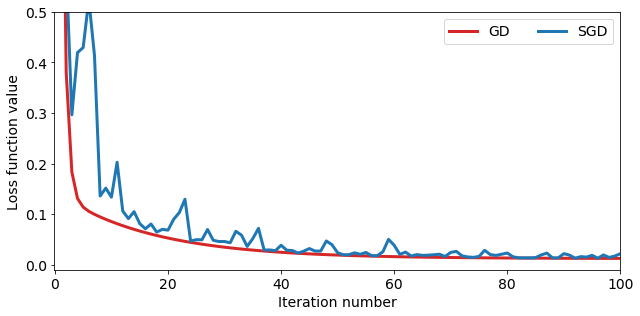

In [13]:
plt.figure(figsize=(9, 4.5))

#plt.plot(X[:, 1], y_ideal, linewidth=2, label=r"$y = 1 + 0.2x_{1}$", color='0')
plt.plot(loss_iters, linewidth=3, label="GD", color='C3')
plt.plot(loss_iters_sgd, linewidth=3, label="SGD", color='C0')

plt.xlabel(r'Iteration number', size=14)
plt.xticks(size=14)

plt.ylabel(r"Loss function value", size=14)
plt.yticks(size=14)

plt.xlim(-0.1, 100)
plt.ylim(-0.01, .5)


plt.legend(loc='best', fontsize=14, ncol=2)

plt.tight_layout()
plt.savefig(fname="plots/approximation_example_3_2.pdf", format="pdf")
plt.show()

In [14]:
# Generate grid
N = 100
box = 2
x1 = np.linspace(-0.5, 2.5, N)
x2 = np.linspace(-0.5, 2.5, N)

x1_grid, x2_grid = np.meshgrid(x1, x2)
f_grid = np.zeros(shape=x1_grid.shape)

x1_grid_lin = x1_grid.reshape(-1, )
x2_grid_lin = x2_grid.reshape(-1, )
f_grid_lin = f_grid.reshape(-1, )

for i in range(len(f_grid_lin)):
    f_grid_lin[i] = loss([x1_grid_lin[i], x2_grid_lin[i]], X, y)
    
x1_grid = x1_grid_lin.reshape(N, N)
x2_grid = x2_grid_lin.reshape(N, N)
f_grid = f_grid_lin.reshape(N, N)

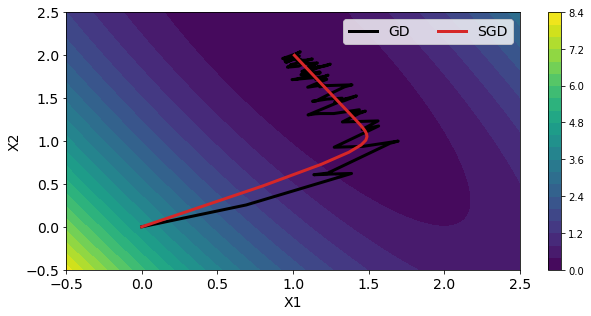

In [15]:
plt.figure(figsize=(9, 4.5))
plt.contourf(x1, x2, f_grid, levels=20)
plt.colorbar()

#plt.scatter(beta_iters_sgd[:, 0], beta_iters_sgd[:, 1], color='0', linewidth=2)
plt.plot(beta_iters_sgd[:, 0], beta_iters_sgd[:, 1], color='0', linewidth=3, label='GD')

#plt.scatter(beta_iters[:, 0], beta_iters[:, 1], color='C3', linewidth=2)
plt.plot(beta_iters[:, 0], beta_iters[:, 1], color='C3', linewidth=3, label='SGD')

plt.xlabel('X1', size=14)
plt.xticks(size=14)

plt.ylabel('X2', size=14)
plt.yticks(size=14)

plt.xlim(-box, box)
plt.ylim(-box, box)

plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)

plt.legend(loc='best', fontsize=14, ncol=2)

plt.tight_layout()
plt.savefig(fname="plots/approximation_example_3_3.pdf", format="pdf")
plt.show()